In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

tracks_df = pd.read_parquet("data/02-track_features_balanced_wide.pq")
# try factor analysis
# impute missing values

In [2]:
tsne = TSNE(n_components=2, random_state=42)

In [4]:
tracks_df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'duration_ms', 'year',
       'release_date', 'popularity', 'isrc', 'audio_features', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'months', 'indicativerevenue', 'position_max', 'position_mean',
       'position_median', 'recording_award_category',
       'recording_award_nominee', 'recording_award_winner',
       'album_award_category', 'album_award_nominee', 'album_award_winner',
       'artist_total_nominations', 'artist_total_wins',
       'artist_first_nomination', 'artist_first_win',
       'artist_previous_nominations', 'artist_previous_wins', 'chart_status',
       'award_status', 'artist_status'],
      dtype='object')

In [6]:
tracks_df[['danceability',
'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.794,0.937,8.0,-2.440,0.0,0.0336,0.36600,0.000004,0.9620,0.826,134.012,4.0
1,0.684,0.654,7.0,-9.178,0.0,0.0663,0.22800,0.000000,0.0336,0.539,92.076,4.0
2,0.599,0.582,11.0,-9.090,1.0,0.0287,0.00213,0.000600,0.3080,0.629,152.020,4.0
3,0.681,0.602,8.0,-10.552,0.0,0.1160,0.01190,0.402000,0.4210,0.698,160.084,4.0
4,0.817,0.816,2.0,-5.402,1.0,0.2690,0.00263,0.000000,0.1590,0.508,181.982,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4241,0.674,0.413,2.0,-7.816,1.0,0.0274,0.83600,0.000019,0.0980,0.503,124.893,3.0
4242,0.893,0.740,11.0,-4.936,0.0,0.1320,0.29900,0.000000,0.0881,0.963,101.025,4.0
4243,0.687,0.454,4.0,-9.379,1.0,0.0255,0.61400,0.000107,0.1070,0.331,103.930,4.0
4244,0.565,0.258,11.0,-12.929,0.0,0.0320,0.44200,0.000000,0.1420,0.173,73.969,4.0


/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


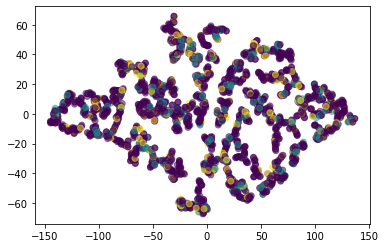

In [37]:
from slugify import slugify

track_samples_df = (
    tracks_df
        .sample(n=2500)
        .set_index("id")
        [[
                "artists",
                "artist_status",
                'danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo', 'time_signature',
        ]]
        .dropna()
)
X = track_samples_df.drop(columns={"artists", "artist_status"})
y = track_samples_df["artist_status"]
ylabels = track_samples_df["artists"].apply(slugify)

tsne = TSNE(n_components=2, random_state=1, init="pca", perplexity=10)
tsne_repr = tsne.fit_transform(X)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5, c=y);
print ('At iteration %s KL divergence:%s' % (tsne.n_iter_,tsne.kl_divergence_)) # Kullback-Leibler divergence after optimization.

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


At iteration 999 KL divergence:0.9331573247909546


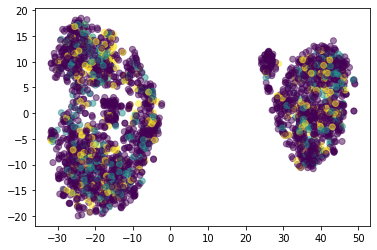

In [42]:
tsne = TSNE(n_components=2, random_state=1, init="pca", perplexity=100)
tsne_repr = tsne.fit_transform(X)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5, c=y);
print ('At iteration %s KL divergence:%s' % (tsne.n_iter_,tsne.kl_divergence_)) # Kullback-Leibler divergence after optimization.

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


At iteration 999 KL divergence:1.1505241394042969


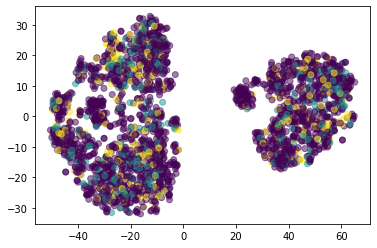

In [43]:
tsne = TSNE(n_components=2, random_state=1, init="pca", perplexity=50)
tsne_repr = tsne.fit_transform(X)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5, c=y);
print ('At iteration %s KL divergence:%s' % (tsne.n_iter_,tsne.kl_divergence_)) # Kullback-Leibler divergence after optimization.

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


At iteration 999 KL divergence:1.2764530181884766


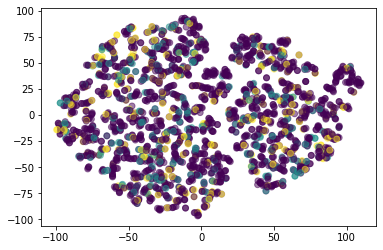

In [44]:
tsne = TSNE(n_components=2, random_state=1, init="pca", perplexity=5)
tsne_repr = tsne.fit_transform(X)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5, c=y);
print ('At iteration %s KL divergence:%s' % (tsne.n_iter_,tsne.kl_divergence_)) # Kullback-Leibler divergence after optimization.


In [45]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, y, ylabel, ax, title):
    # (X, y, ylabel)
    X = MinMaxScaler().fit_transform(X)

    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        if i % 10 == 0:
            continue
        if np.random.randint(1000) > 999:
            continue
        # plot every digit on the embedding
        try:
            ax.text(
                X[i, 0],
                X[i, 1],
                str(y[i]),
                color=plt.cm.Dark2(y[i]),
                fontdict={"weight": "bold", "size": 9},
            )

            # show an annotation box for a group of digits
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            ax.text(
                X[i, 0],
                X[i, 1],
                str(ylabel[i]),
                color=plt.cm.Dark2(y[i]),
                fontdict={"weight": "bold", "size": 9},
            )
        except Exception as err:
            continue

    ax.set_title(title)
    ax.axis("off")

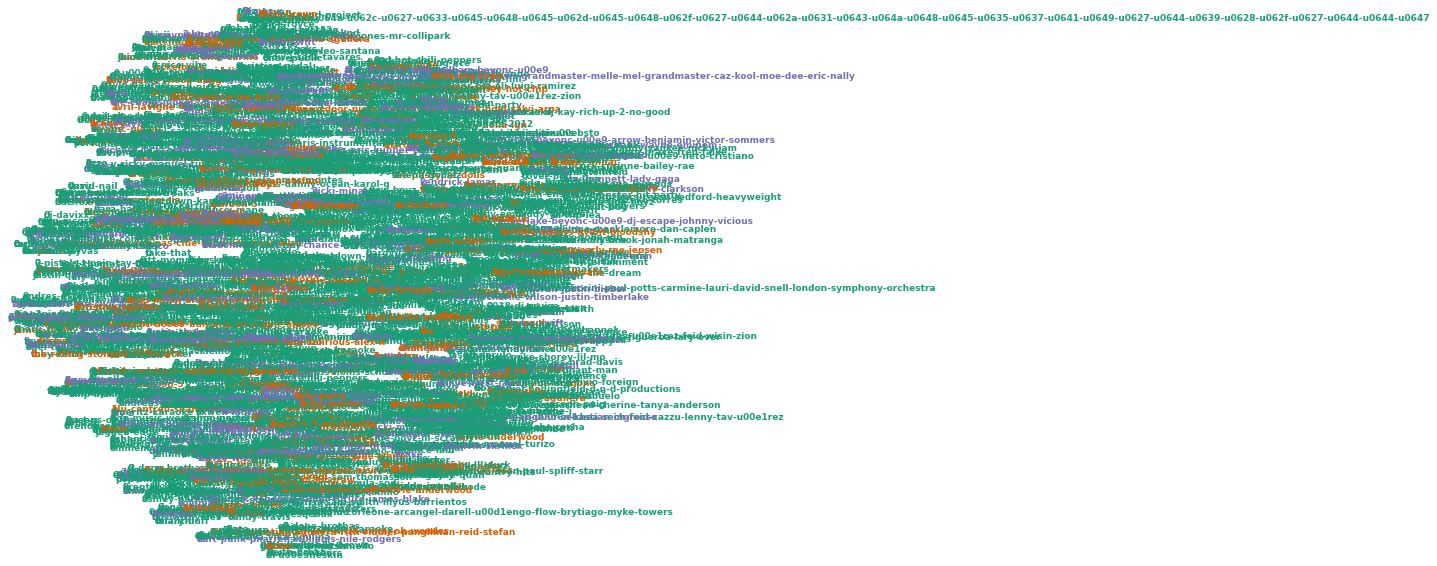

In [46]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plot_embedding(tsne_repr, y, ylabels, ax, title='')

In [ ]:
tsne = TSNE(n_components = 2, random_state=1, init='pca',perplexity=100)

In [48]:
X = MinMaxScaler().fit_transform(X)

shown_images = np.array([[1.0, 1.0]])  # just something big
for i in range(X.shape[0]):
    if i % 10 == 0:
        continue
    if np.random.randint(1000) > 999:
        continue
    print(i)
    # plot every digit on the embedding
    #try:
    #ax.text(
    #    X[i, 0],
    #    X[i, 1],
    #    str(y[i]),
    #    color=plt.cm.Dark2(y[i]),
    #    fontdict={"weight": "bold", "size": 9},
    #)


1
2
3
4
5
6
7
8
9
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38
39
41
42
43
44
45
46
47
48
49
51
52
53
54
55
56
57
58
59
61
62
63
64
65
66
67
68
69
71
72
73
74
75
76
77
78
79
81
82
83
84
85
86
87
88
89
91
92
93
94
95
96
97
98
99
101
102
103
104
105
106
107
108
109
111
112
113
114
115
116
117
118
119
121
122
123
124
125
126
127
128
129
131
132
133
134
135
136
137
138
139
141
142
143
144
145
146
147
148
149
151
152
153
154
155
156
157
158
159
161
162
163
164
165
166
167
168
169
171
172
173
174
175
176
177
178
179
181
182
183
184
185
186
187
188
189
191
192
193
194
195
196
197
198
199
201
202
203
204
205
206
207
208
209
211
212
213
214
215
216
217
218
219
221
222
223
224
225
226
227
228
229
231
232
233
234
235
236
237
238
239
241
242
243
244
245
246
247
248
249
251
252
253
254
255
256
257
258
259
261
262
263
264
265
266
267
268
269
271
272
273
274
275
276
277
278
279
281
282
283
284
285
286
287
288
289
291
292
293
294
295
296
297
298
299
301
302
303
304
305